# Applied Machine Learining Final Project

*Predictive Modeling on Diabetes Dataset*

### Import Libraries

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [311]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### View Data

In [312]:
df.head(12672)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
12667,Female,54.0,0,0,ever,43.54,6.6,260,1
12668,Female,22.0,0,0,current,30.63,6.2,130,0
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
12670,Female,24.0,0,0,never,21.22,5.8,155,0


### Clean the Data

In [313]:
# check values in columns

print('\nUnique values in gender:', df['gender'].unique())
print('\nUnique values in hypertension:', df['hypertension'].unique())
print('\nUnique values in heart_disease:', df['heart_disease'].unique())
print('\nUnique values in smoking_history:', df['smoking_history'].unique())
print('\nUnique values in diabetes:', df['diabetes'].unique())


Unique values in gender: ['Female' 'Male' 'Other']

Unique values in hypertension: [0 1]

Unique values in heart_disease: [1 0]

Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique values in diabetes: [0 1]


In [314]:
# drop rows with gender as 'Other'
df = df[(df['gender'] != 'Other')]

# drop rows with smoking_history as 'Unknown'
df = df[(df['smoking_history'] != 'No Info')]

# fixing typo in smoking_history 'ever' to 'never'
df['smoking_history'] = df['smoking_history'].replace('ever', 'never')

# change in smoking_history 'not current' to 'former'
df['smoking_history'] = df['smoking_history'].replace('not current', 'former')

In [315]:
# check if changes applied

print('\nUpdated values in gender:', df['gender'].unique())
print('\nUpdated values in smoking_history:', df['smoking_history'].unique())


Updated values in gender: ['Female' 'Male']

Updated values in smoking_history: ['never' 'current' 'former']


### Encoding the data

In [316]:
# import encoder
from sklearn.preprocessing import OneHotEncoder

# encode 'gender' 
gender_encoder = OneHotEncoder(drop='first', sparse_output=False)
gender_encoded = gender_encoder.fit_transform(df[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['is_male'])

# encode 'smoking_history'
smoking_encoder = OneHotEncoder(sparse_output=False)
smoking_encoded = smoking_encoder.fit_transform(df[['smoking_history']])
smoking_encoded_df = pd.DataFrame(smoking_encoded, columns=smoking_encoder.get_feature_names_out(['smoking_history']))

# merge encoded with the original data
df = df.drop(['gender', 'smoking_history'], axis=1).reset_index(drop=True)
df = pd.concat([gender_encoded_df, smoking_encoded_df, df], axis=1)


In [317]:
print(df.columns)

Index(['is_male', 'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'age', 'hypertension', 'heart_disease', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


### Extract the variables

In [318]:
X = df.drop('diabetes', axis=1).values # features, all columns except 'diabetes'
y = df['diabetes'].values              # target variable

### Split the dataset

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature scaling

In [321]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define models

In [322]:
# import the model libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# dictionary
models = {
    "SVM - Linear": SVC(kernel = 'linear', random_state = 0),
    "SVM - Polynomial": SVC(kernel = 'poly', random_state = 0),
    "SVM - Sigmoid": SVC(kernel = 'sigmoid', random_state = 0),
    "SVM - Radial Basis Function": SVC(kernel = 'rbf', random_state = 0),
    "Logistic Regression": LogisticRegression(random_state= 0),
    "Random Forest - Entropy": RandomForestClassifier(n_estimators= 12, criterion= 'entropy', random_state = 0),
    "Random Forest - Gini": RandomForestClassifier(n_estimators= 12, criterion= 'gini', random_state = 0),
    "K-Nearest Neighbors - Manhattan Distance": KNeighborsClassifier(n_neighbors = 5, p = 1),
    "K-Nearest Neighbors - Euclidean Distance": KNeighborsClassifier(n_neighbors = 5, p = 2)
}

### Train models and compare

Using 70/30 training testing split

70/30 Split Metrics

SVM - Linear Accuracy: 95.01 %
SVM - Linear Recall: 59.18 %
SVM - Linear Precision: 91.42 %
SVM - Linear F1 Score: 71.85 %
Confusion Matrix for SVM - Linear:


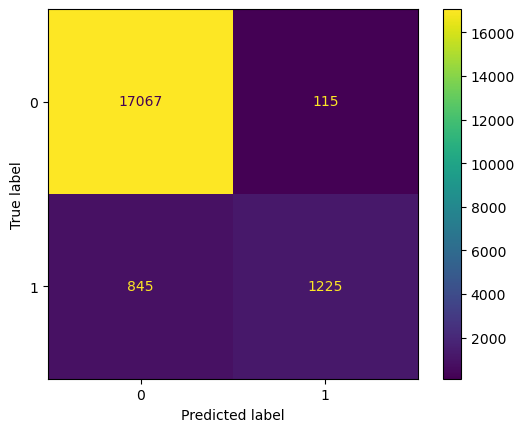

SVM - Polynomial Accuracy: 95.39 %
SVM - Polynomial Recall: 58.50 %
SVM - Polynomial Precision: 97.74 %
SVM - Polynomial F1 Score: 73.19 %
Confusion Matrix for SVM - Polynomial:


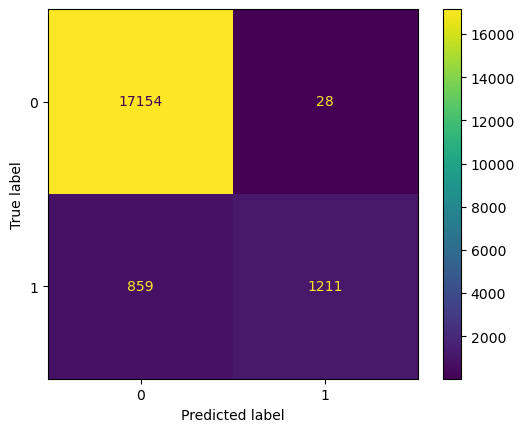

SVM - Sigmoid Accuracy: 89.64 %
SVM - Sigmoid Recall: 51.50 %
SVM - Sigmoid Precision: 51.85 %
SVM - Sigmoid F1 Score: 51.67 %
Confusion Matrix for SVM - Sigmoid:


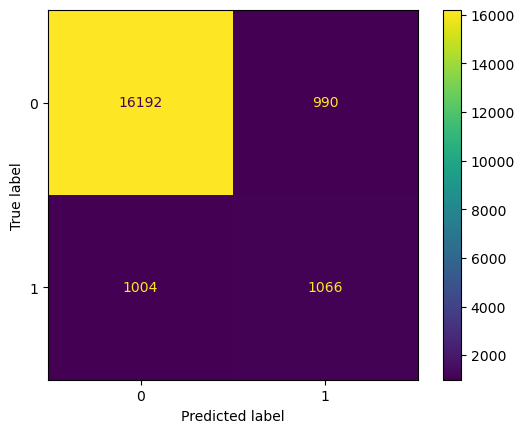

SVM - Radial Basis Function Accuracy: 95.32 %
SVM - Radial Basis Function Recall: 58.60 %
SVM - Radial Basis Function Precision: 96.50 %
SVM - Radial Basis Function F1 Score: 72.92 %
Confusion Matrix for SVM - Radial Basis Function:


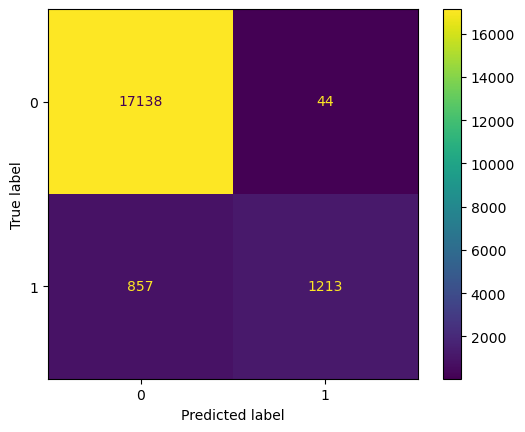

Logistic Regression Accuracy: 94.94 %
Logistic Regression Recall: 63.62 %
Logistic Regression Precision: 85.63 %
Logistic Regression F1 Score: 73.00 %
Confusion Matrix for Logistic Regression:


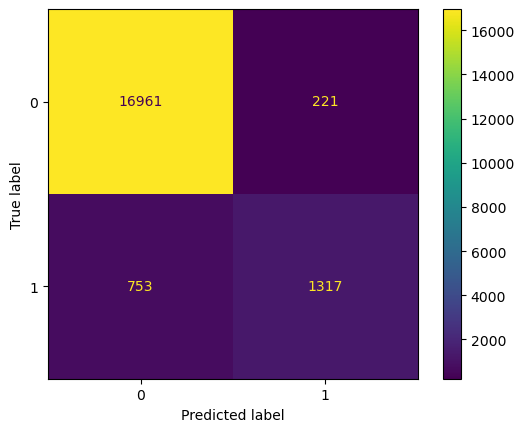

Random Forest - Entropy Accuracy: 96.04 %
Random Forest - Entropy Recall: 68.79 %
Random Forest - Entropy Precision: 92.41 %
Random Forest - Entropy F1 Score: 78.87 %
Confusion Matrix for Random Forest - Entropy:


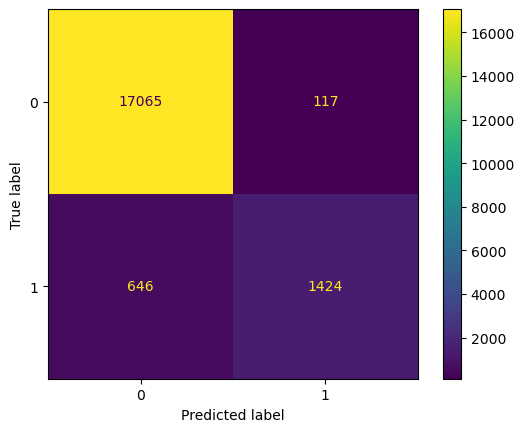

Random Forest - Gini Accuracy: 95.97 %
Random Forest - Gini Recall: 68.70 %
Random Forest - Gini Precision: 91.80 %
Random Forest - Gini F1 Score: 78.59 %
Confusion Matrix for Random Forest - Gini:


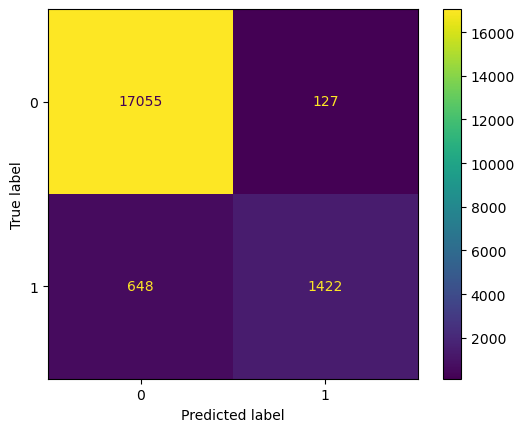

K-Nearest Neighbors - Manhattan Distance Accuracy: 95.01 %
K-Nearest Neighbors - Manhattan Distance Recall: 61.50 %
K-Nearest Neighbors - Manhattan Distance Precision: 88.65 %
K-Nearest Neighbors - Manhattan Distance F1 Score: 72.62 %
Confusion Matrix for K-Nearest Neighbors - Manhattan Distance:


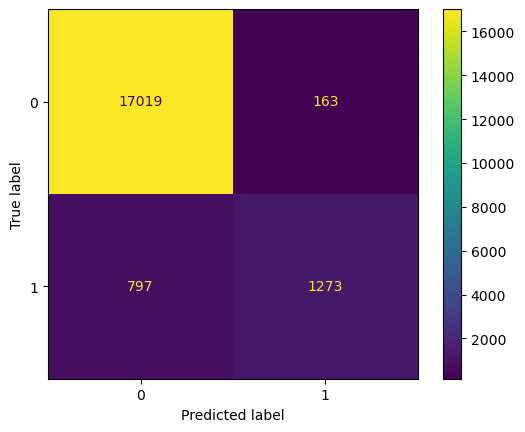

K-Nearest Neighbors - Euclidean Distance Accuracy: 94.93 %
K-Nearest Neighbors - Euclidean Distance Recall: 61.79 %
K-Nearest Neighbors - Euclidean Distance Precision: 87.30 %
K-Nearest Neighbors - Euclidean Distance F1 Score: 72.36 %
Confusion Matrix for K-Nearest Neighbors - Euclidean Distance:


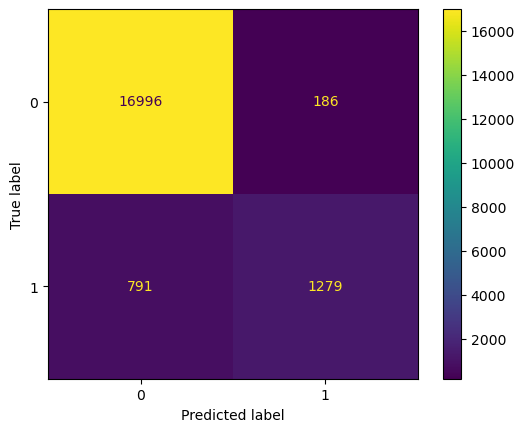

In [323]:
print("70/30 Split Metrics\n")

acc70_30 = []
recall70_30 = []
prec70_30 = []
f170_30 = []

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict on the test set
    acc = accuracy_score(y_test, y_pred) # accuracy score
    recall = recall_score(y_test, y_pred) # recall score
    precision = precision_score(y_test, y_pred) # precision score
    f1 = f1_score(y_test, y_pred) # f1 score
    print(f"{name} Accuracy: {100*acc:.2f} %") # print accuracy
    print(f"{name} Recall: {100*recall:.2f} %") # print recall score
    print(f"{name} Precision: {100*precision:.2f} %") # print precision score
    print(f"{name} F1 Score: {100*f1:.2f} %") # print f1 score
    cm = (confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    print(f"Confusion Matrix for {name}:") # print confusion matrix
    disp.plot()
    plt.show()

    
    acc70_30.append((name, acc*100))
    recall70_30.append((name, recall*100))
    prec70_30.append((name, precision*100))
    f170_30.append((name, f1*100))

Plot the metrics of 70/30 split

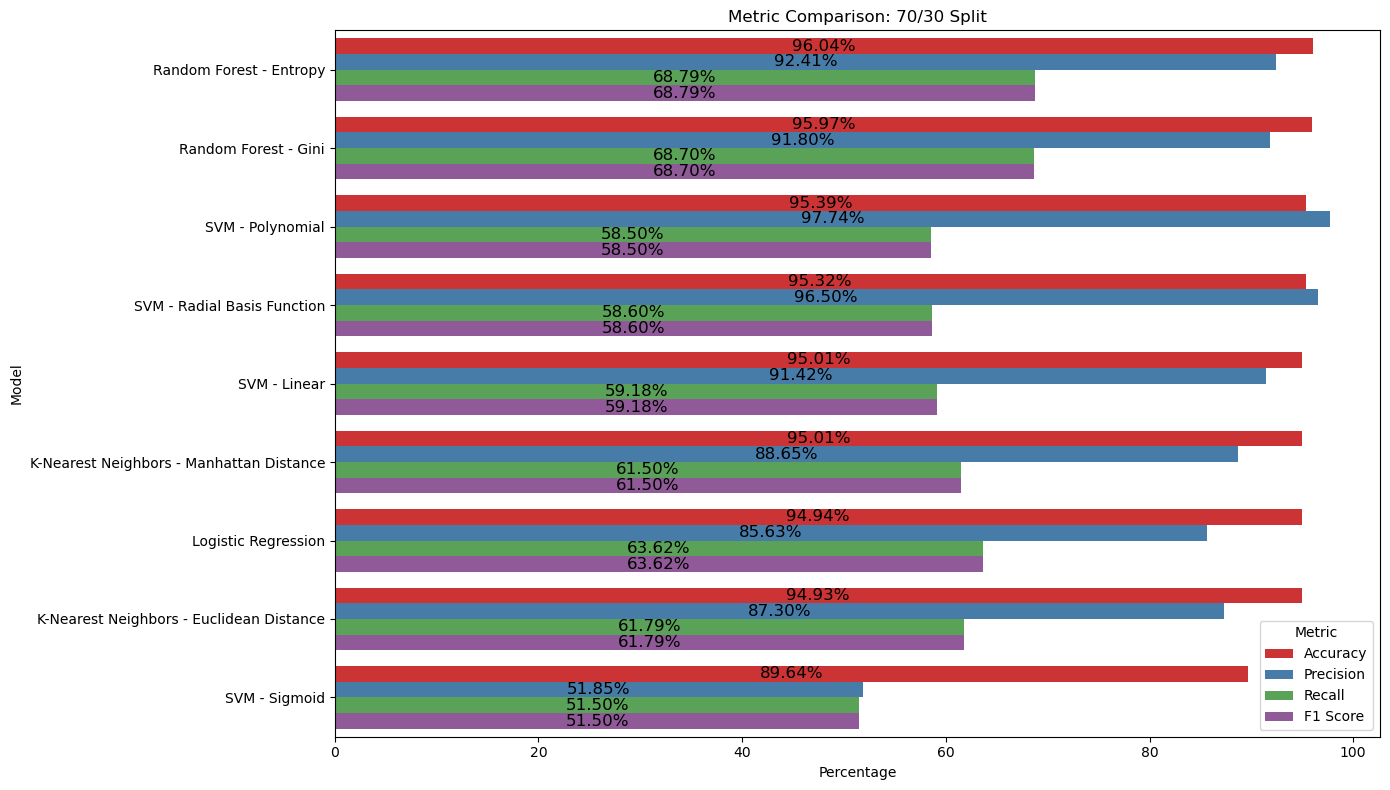

In [ ]:
import pandas as pd
import seaborn as sns

acc70_30.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)

dfacc_70 = pd.DataFrame(acc70_30, columns=["Model", "Percentage"]) # create DataFrame
dfacc_70["Metric"] = "Accuracy" # add metric column

dfrec_70 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
dfrec_70["Metric"] = "Recall"

dfpre_70 = pd.DataFrame(prec70_30, columns=["Model", "Percentage"])
dfpre_70["Metric"] = "Precision" 

df1_70 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
df1_70["Metric"] = "F1 Score" 

combined_df = pd.concat([dfacc_70,dfpre_70, dfrec_70, df1_70]) # combine the DataFrames

# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Percentage", y="Model", hue="Metric", palette="Set1")

# add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=12)

# Plot format
plt.title("Metric Comparison: 70/30 Split")
plt.xlabel("Percentage")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Using 80/20 training testing split

80/20 Split Metrics

SVM - Linear Accuracy: 95.08 %
SVM - Linear Recall: 59.78 %
SVM - Linear Precision: 91.92 %
SVM - Linear F1 Score: 72.45 %
Confusion Matrix for SVM - Linear:


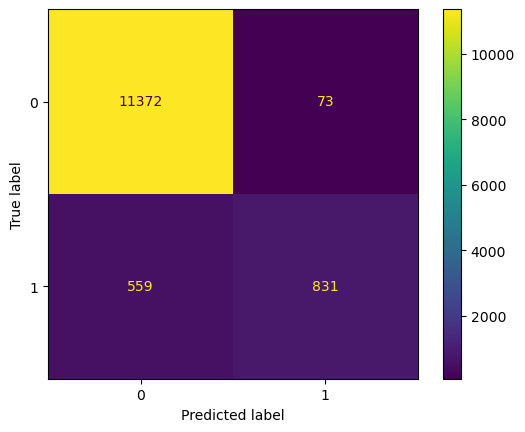

SVM - Polynomial Accuracy: 95.46 %
SVM - Polynomial Recall: 59.35 %
SVM - Polynomial Precision: 97.86 %
SVM - Polynomial F1 Score: 73.89 %
Confusion Matrix for SVM - Polynomial:


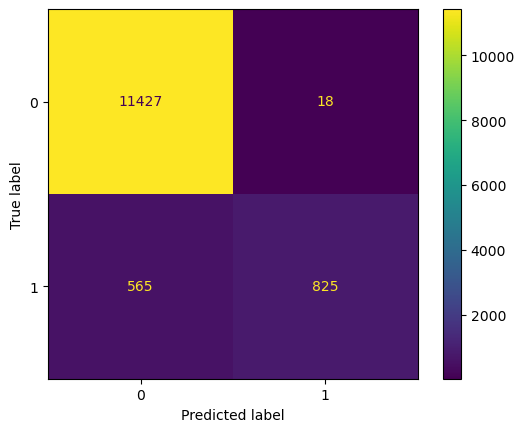

SVM - Sigmoid Accuracy: 89.79 %
SVM - Sigmoid Recall: 51.15 %
SVM - Sigmoid Precision: 52.94 %
SVM - Sigmoid F1 Score: 52.03 %
Confusion Matrix for SVM - Sigmoid:


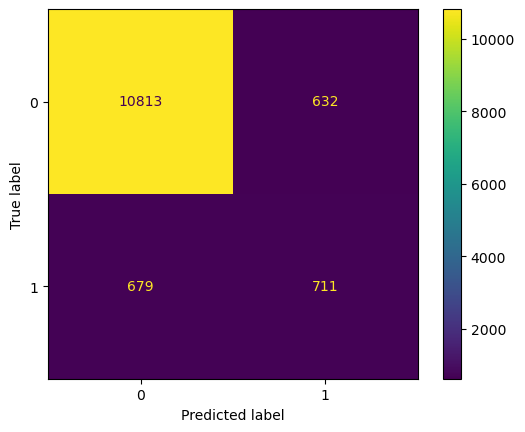

SVM - Radial Basis Function Accuracy: 95.40 %
SVM - Radial Basis Function Recall: 59.28 %
SVM - Radial Basis Function Precision: 97.17 %
SVM - Radial Basis Function F1 Score: 73.64 %
Confusion Matrix for SVM - Radial Basis Function:


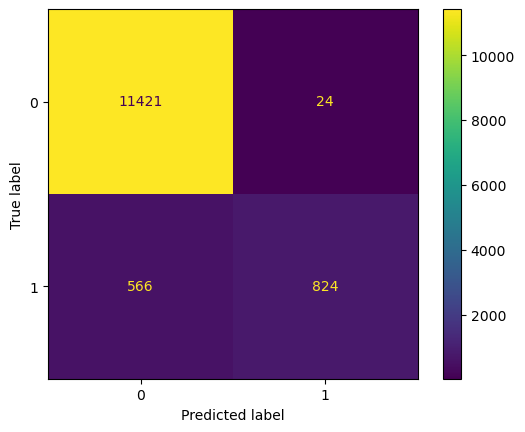

Logistic Regression Accuracy: 95.04 %
Logistic Regression Recall: 64.46 %
Logistic Regression Precision: 86.32 %
Logistic Regression F1 Score: 73.81 %
Confusion Matrix for Logistic Regression:


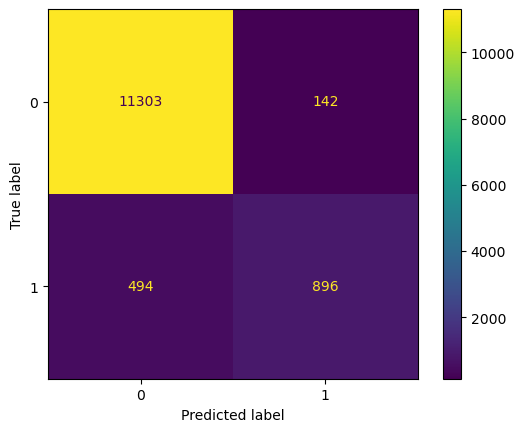

Random Forest - Entropy Accuracy: 96.15 %
Random Forest - Entropy Recall: 68.49 %
Random Forest - Entropy Precision: 94.44 %
Random Forest - Entropy F1 Score: 79.40 %
Confusion Matrix for Random Forest - Entropy:


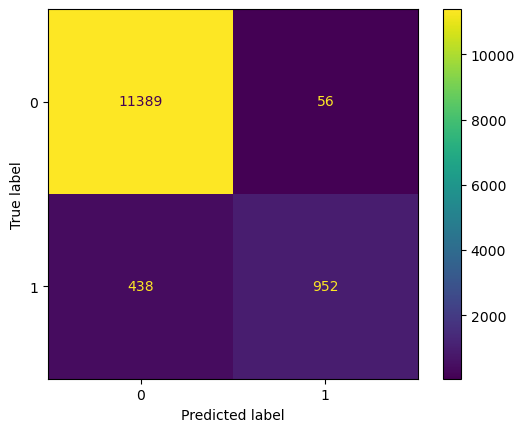

Random Forest - Gini Accuracy: 96.07 %
Random Forest - Gini Recall: 68.63 %
Random Forest - Gini Precision: 93.35 %
Random Forest - Gini F1 Score: 79.10 %
Confusion Matrix for Random Forest - Gini:


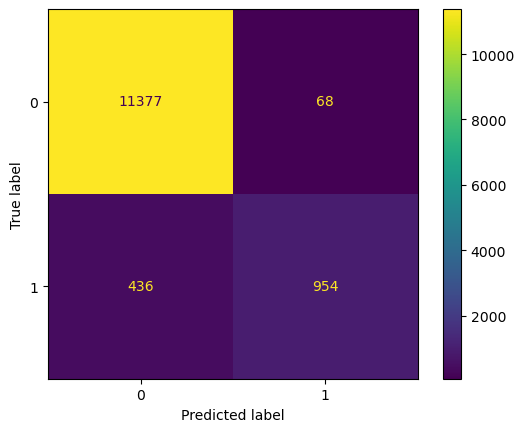

K-Nearest Neighbors - Manhattan Distance Accuracy: 95.11 %
K-Nearest Neighbors - Manhattan Distance Recall: 63.02 %
K-Nearest Neighbors - Manhattan Distance Precision: 88.48 %
K-Nearest Neighbors - Manhattan Distance F1 Score: 73.61 %
Confusion Matrix for K-Nearest Neighbors - Manhattan Distance:


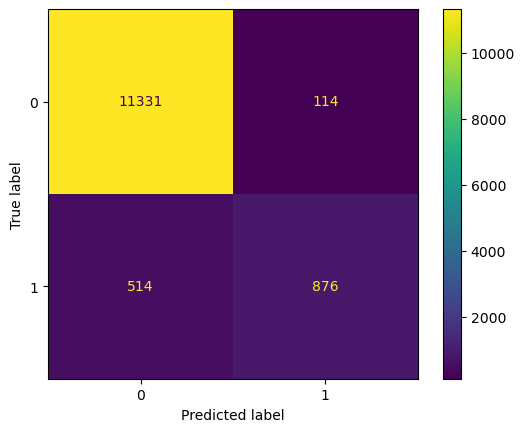

K-Nearest Neighbors - Euclidean Distance Accuracy: 95.12 %
K-Nearest Neighbors - Euclidean Distance Recall: 63.31 %
K-Nearest Neighbors - Euclidean Distance Precision: 88.35 %
K-Nearest Neighbors - Euclidean Distance F1 Score: 73.76 %
Confusion Matrix for K-Nearest Neighbors - Euclidean Distance:


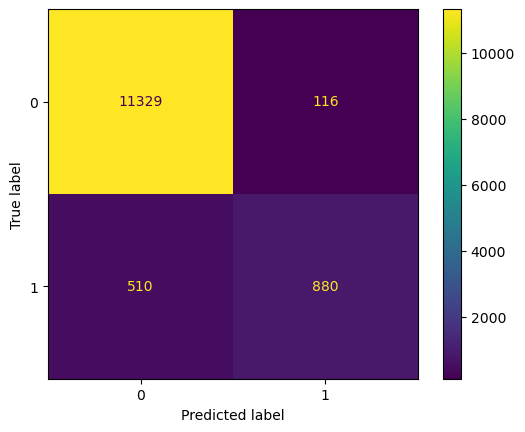

In [325]:
# 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("80/20 Split Metrics\n")

acc80_20 = []
recall80_20 = []
prec80_20 = []
f180_20 = []

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict on the test set
    acc = accuracy_score(y_test, y_pred) # accuracy score
    recall = recall_score(y_test, y_pred) # recall score
    precision = precision_score(y_test, y_pred) # precision score
    f1 = f1_score(y_test, y_pred) # f1 score
    print(f"{name} Accuracy: {100*acc:.2f} %") # print accuracy
    print(f"{name} Recall: {100*recall:.2f} %") # print recall score
    print(f"{name} Precision: {100*precision:.2f} %") # print precision score
    print(f"{name} F1 Score: {100*f1:.2f} %") # print f1 score
    cm = (confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    print(f"Confusion Matrix for {name}:") # print confusion matrix
    disp.plot()
    plt.show()

    acc80_20.append((name, acc*100))
    recall80_20.append((name, recall*100))
    prec80_20.append((name, precision*100))
    f180_20.append((name, f1*100))

Plot the metrics of  80/20 split

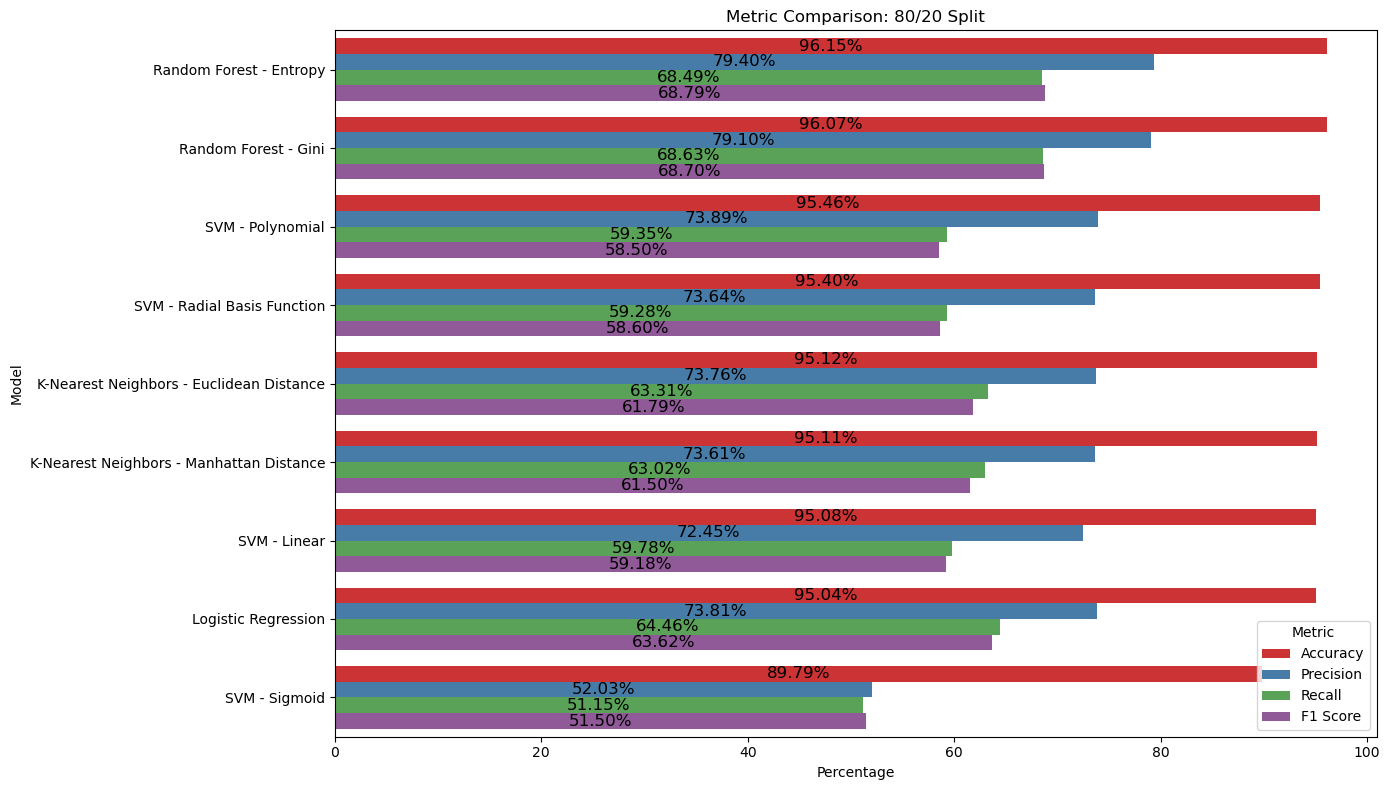

In [ ]:
import pandas as pd
import seaborn as sns

acc80_20.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)

dfacc_80 = pd.DataFrame(acc80_20, columns=["Model", "Percentage"]) # create DataFrame
dfacc_80["Metric"] = "Accuracy" #  add metric column

dfrec_80 = pd.DataFrame(recall80_20, columns=["Model", "Percentage"])
dfrec_80["Metric"] = "Recall" 

dfpre_80 = pd.DataFrame(f180_20, columns=["Model", "Percentage"])
dfpre_80["Metric"] = "Precision" 

df1_80 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
df1_80["Metric"] = "F1 Score" 

combined_df = pd.concat([dfacc_80, dfpre_80, dfrec_80, df1_80]) # Combine the DataFrames

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Percentage", y="Model", hue="Metric", palette="Set1")

# Add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=12)

# Plot format
plt.title("Metric Comparison: 80/20 Split")
plt.xlabel("Percentage")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### Cross validation

Plot the metrics of cross validation


Cross-Validation Accuracy (5-Fold):

SVM - Linear --> Accuracy: 94.97% (+/- 0.14%)
Confusion Matrix for SVM - Linear:


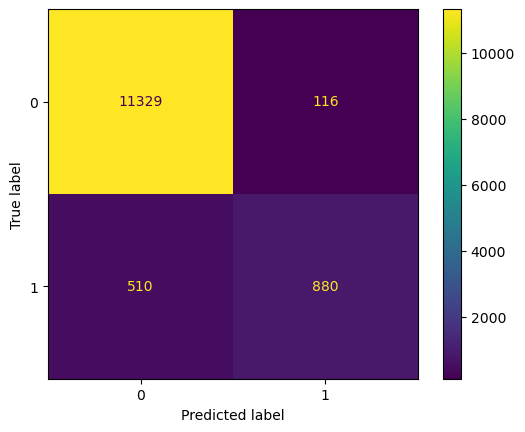

SVM - Polynomial --> Accuracy: 95.35% (+/- 0.09%)
Confusion Matrix for SVM - Polynomial:


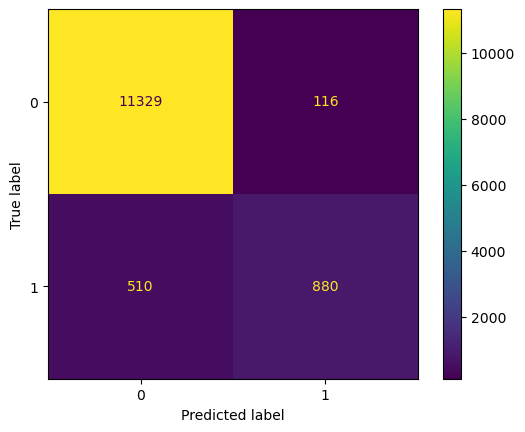

SVM - Sigmoid --> Accuracy: 89.67% (+/- 0.29%)
Confusion Matrix for SVM - Sigmoid:


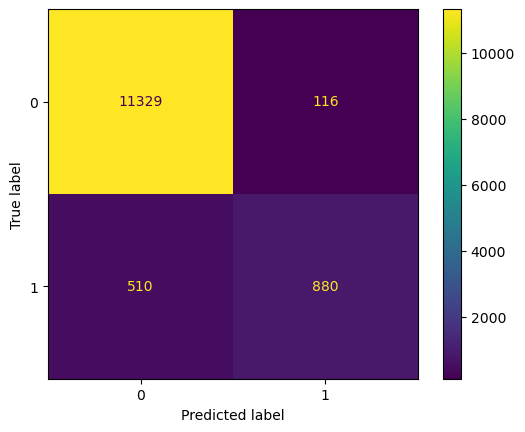

SVM - Radial Basis Function --> Accuracy: 95.23% (+/- 0.12%)
Confusion Matrix for SVM - Radial Basis Function:


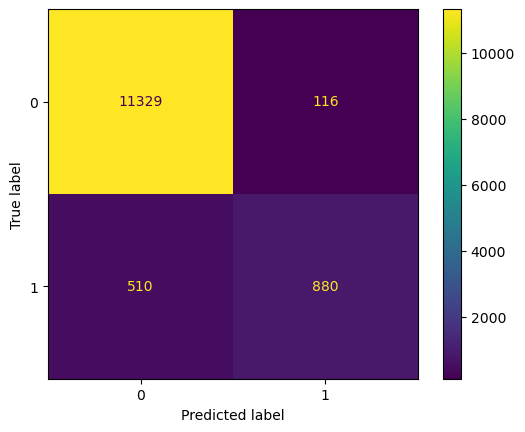

Logistic Regression --> Accuracy: 94.88% (+/- 0.13%)
Confusion Matrix for Logistic Regression:


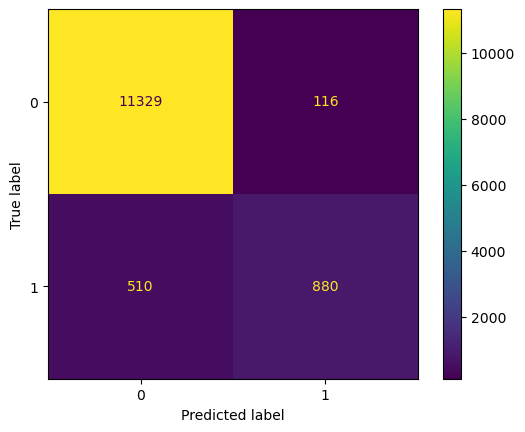

Random Forest - Entropy --> Accuracy: 96.03% (+/- 0.12%)
Confusion Matrix for Random Forest - Entropy:


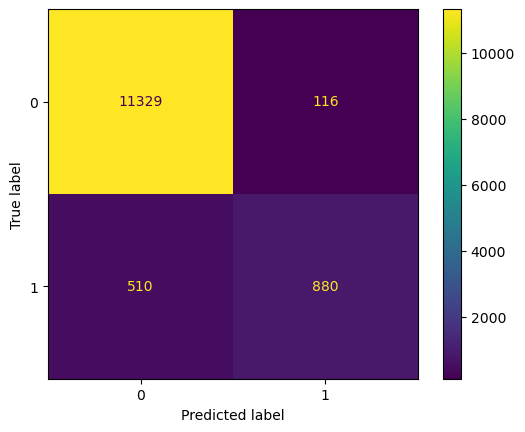

Random Forest - Gini --> Accuracy: 96.00% (+/- 0.12%)
Confusion Matrix for Random Forest - Gini:


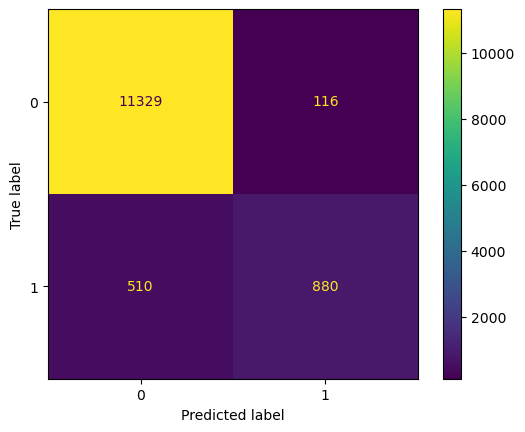

K-Nearest Neighbors - Manhattan Distance --> Accuracy: 94.90% (+/- 0.19%)
Confusion Matrix for K-Nearest Neighbors - Manhattan Distance:


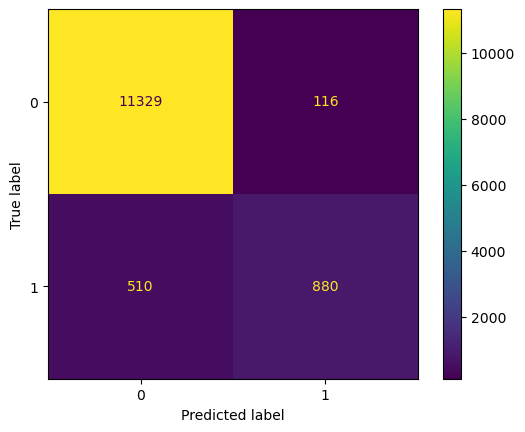

K-Nearest Neighbors - Euclidean Distance --> Accuracy: 94.81% (+/- 0.21%)
Confusion Matrix for K-Nearest Neighbors - Euclidean Distance:


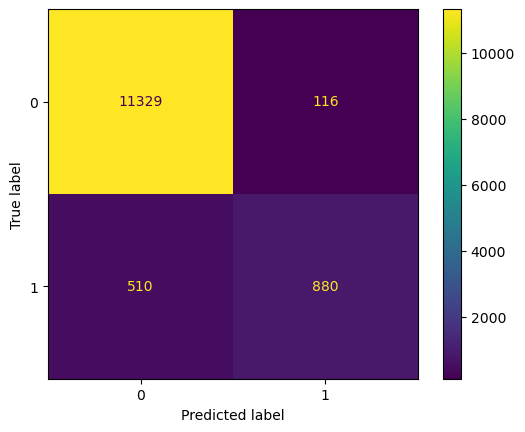

In [328]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# lists to store results
cv_results = []
acc_cv = []

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

print("\nCross-Validation Accuracy (5-Fold):\n")

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy') # cross-validation accuracy
    mean_acc = scores.mean() * 100 
    std_acc = scores.std() * 100 
    cv_results.append((name, mean_acc, std_acc)) # store results
    acc_cv.append((name, mean_acc)) # store accuracy
    print(f"{name} --> Accuracy: {mean_acc:.2f}% (+/- {std_acc:.2f}%)") # print accuracy and standard deviation

    cm = (confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

    print(f"Confusion Matrix for {name}:") # print confusion matrix
    disp.plot()
    plt.show()
    
model_names = [r[0] for r in cv_results]
accuracies = [r[1] for r in cv_results]
std_devs = [r[2] for r in cv_results]


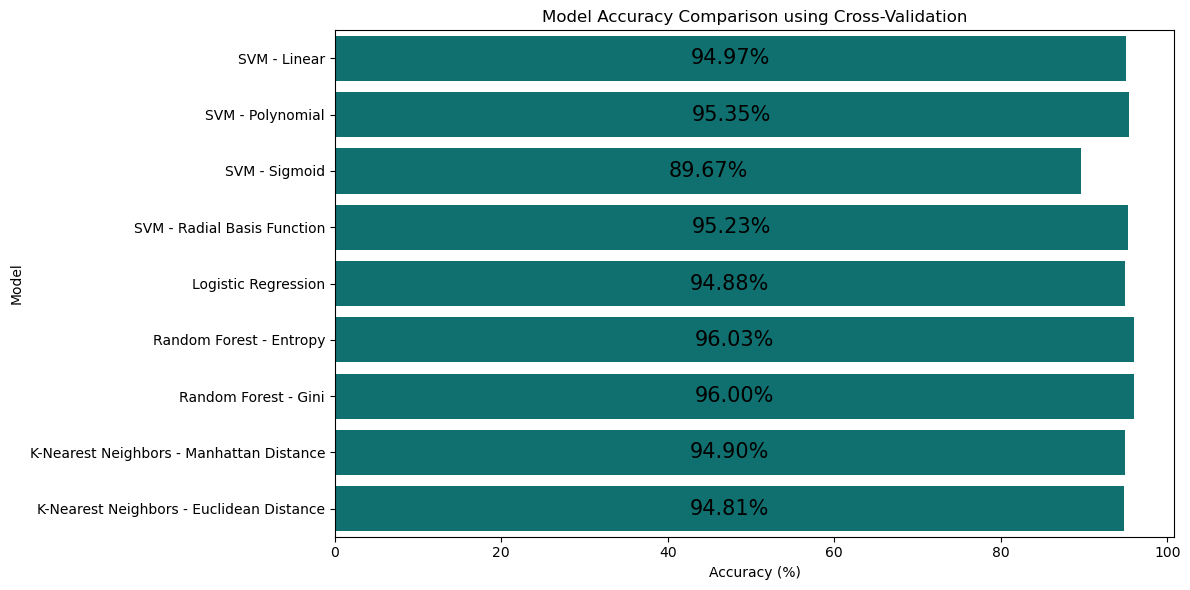

In [329]:

cv_results = pd.DataFrame(cv_results, columns=["Model", "Accuracy", "StdDev"]) # create DataFrame
cv_results.sort_values(by="Accuracy", ascending=False) # sort by accuracy (greatest to least)

# barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cv_results, y='Model', x='Accuracy', color='teal')

# add percentage inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=15, color='Black')

plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison using Cross-Validation')
plt.tight_layout()
plt.show()

### Compare accuracies of all models across all training methods

In [ ]:
acc_cv = pd.DataFrame(acc_cv, columns=["Model", "Accuracy"]) # create DataFrame
acc_cv["Split"] = "Cross Validation" # add split column

dfacc_70 = pd.DataFrame(acc70_30, columns=["Model", "Accuracy"])
dfacc_70["Split"] = "70/30" 

dfacc_80 = pd.DataFrame(acc80_20, columns=["Model", "Accuracy"])
dfacc_80["Split"] = "80/20" 

combined_df = pd.concat([dfacc_70, dfacc_80, acc_cv]) # combine the DataFrames


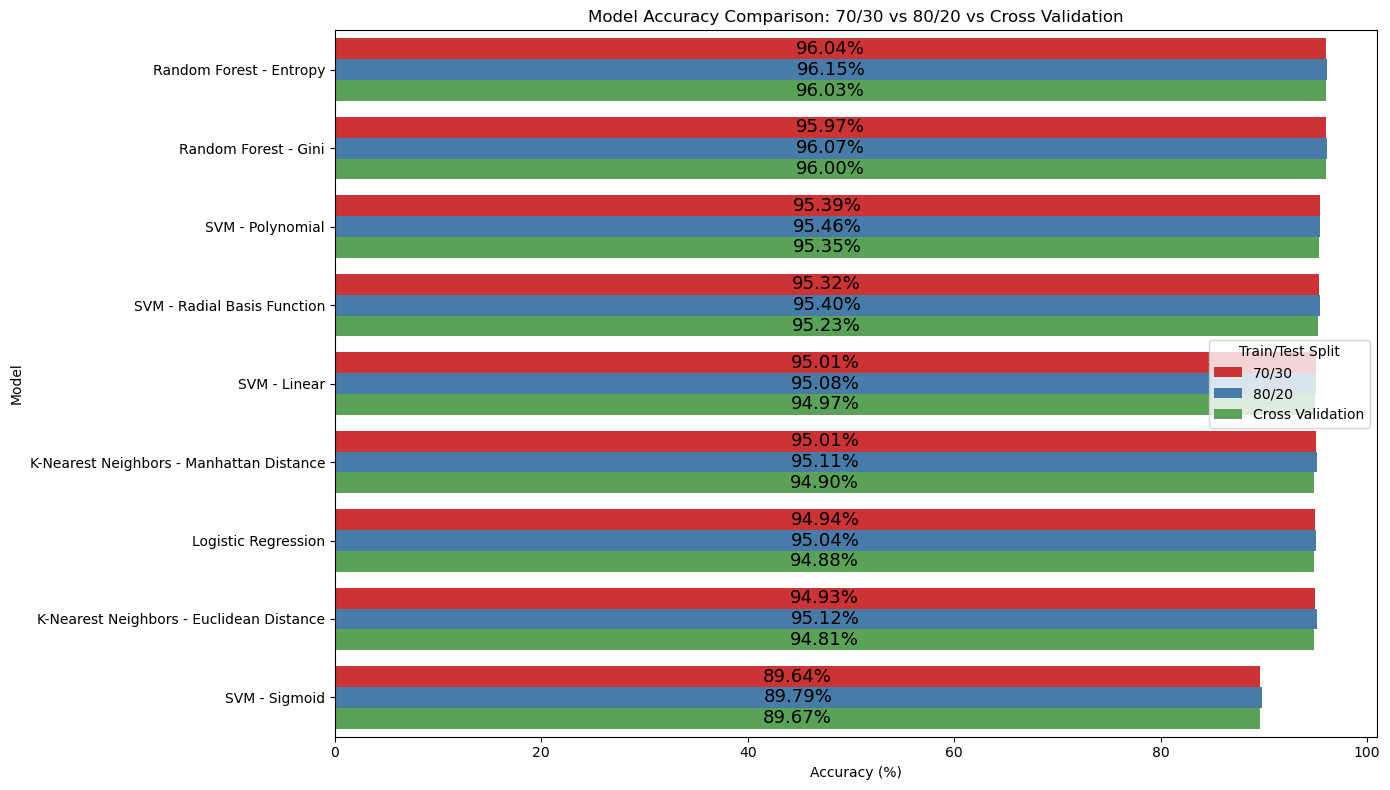

In [ ]:
# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Accuracy", y="Model", hue="Split", palette="Set1")

# add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=13)

# plot format
plt.title("Model Accuracy Comparison: 70/30 vs 80/20 vs Cross Validation")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.legend(title="Train/Test Split")
plt.tight_layout()
plt.show()

### Testing best model on fake data

In [338]:
# check columns in the DataFrame
print("\nColumns in the DataFrame:")
print(df.columns)


Columns in the DataFrame:
Index(['is_male', 'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'age', 'hypertension', 'heart_disease', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
# example test samples 
sample1 = [[1, 1, 0, 0, 45, 0, 0, 35, 8, 200]]  
sample2 = [[0, 0, 0, 1, 21, 0, 0, 20, 4.0, 90]]  
sample3 = [[0, 0, 1, 0, 55, 1, 1, 30, 5.8, 129]]  
sample4 = [[1, 1, 0, 0, 73, 0, 0, 24, 5.0, 118]]  
sample5 = [[1, 0, 0, 1, 23, 0, 0, 30, 5.6, 125]]  

#  must match the order of the columns in the DataFrame
# 'is_male', 'smoking_history_current', 'smoking_history_former', 'smoking_history_never', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'

In [ ]:
# scaling
sample1_scaled = scaler.transform(sample1)
sample2_scaled = scaler.transform(sample2)
sample3_scaled = scaler.transform(sample3)
sample4_scaled = scaler.transform(sample4)
sample5_scaled = scaler.transform(sample5)

In [335]:
# use best model for prediction
# Random Forest Entropy 
rf_model = classifier = RandomForestClassifier(n_estimators= 12, criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
prediction1 = rf_model.predict(sample1_scaled)
prediction2 = rf_model.predict(sample2_scaled)
prediction3 = rf_model.predict(sample3_scaled)
prediction4 = rf_model.predict(sample4_scaled)
prediction5 = rf_model.predict(sample5_scaled)

# result
print("Sample 1 predicted diabetes:", "Diabetic" if prediction1[0] == 1 else "Not Diabetic")
print("Sample 2 predicted diabetes:", "Diabetic" if prediction2[0] == 1 else "Not Diabetic")
print("Sample 3 predicted diabetes:", "Diabetic" if prediction3[0] == 1 else "Not Diabetic")
print("Sample 4 predicted diabetes:", "Diabetic" if prediction4[0] == 1 else "Not Diabetic")
print("Sample 5 predicted diabetes:", "Diabetic" if prediction5[0] == 1 else "Not Diabetic")

Sample 1 predicted diabetes: Diabetic
Sample 2 predicted diabetes: Not Diabetic
Sample 3 predicted diabetes: Not Diabetic
Sample 4 predicted diabetes: Not Diabetic
Sample 5 predicted diabetes: Not Diabetic
